# Business impact of discount

We perform a preliminary examination of the suggested discount strategy, which is one among several possible solutions.

The division head of the SME division proposed offering a 20% discount to customers who are likely to churn. Initially, let's assume that all customers who are offered a discount will accept it.

---
## Workflow

>Our goal is to calculate the estimated revenue for the customer group under the following scenarios:

- When no discount is offered.
- When a discount is offered based on a probability cutoff that determines who should receive the 20% discount.
The aim is to determine the cut-off point that would maximize revenue.



---

### Data loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
test_df = pd.read_csv('./out_of_sample_data_with_predictions.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,0,4947,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,...,0,0,1,0,0,0,0,1,0,0.099
1,1,5868,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,...,0,0,1,0,0,0,0,1,0,0.149
2,2,6805,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,...,0,0,1,0,0,0,0,1,0,0.043
3,3,1323,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,...,0,0,1,0,0,0,0,1,0,0.100
4,4,11759,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,...,0,0,1,0,0,0,1,0,0,0.038


### Calculate a baseline revenue estimate (no intervention)

>Calculate a baseline revenue projection for each customer's electricity usage over the next twelve months based on their forecasted consumption and price, as well as their actual churn status. This can be referred to as "basecase_revenue".

- Adjust for customer churn:

For customers who churn, the forecasted revenue calculation should be adjusted by reducing it by 91.9%. This takes into account that the customer may have churned at any time between January 2016 and the start of March 2016. A reasonable assumption for lost revenue is the average of 100%, representing churn on January 1st, and 83.9%, which represents churn at the end of February. The new variable can be referred to as "basecase_revenue_after_churn", with the calculation being "basecase_revenue_after_churn" = "basecase_revenue" * (1 - 0.919 * "churn").

 ---

In [8]:
# To calculate the electricity revenue for each customer, we consider the product of energy consumption and price, along with the meter rent.
# the power price may also be a factor, but we need additional data from the client before including it in our calculation.
# Additionally, we need to undo the log10-transformation applied during the data cleaning process.
test_df['basecase_revenue'] = (np.power(10, test_df['forecast_cons_12m']) + 1) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
#It's important to factor in the churn when making these calculations.
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [9]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,0,4947,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,...,1,0,0,0,0,1,0,0.099,171.157200,171.157200
1,1,5868,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,...,1,0,0,0,0,1,0,0.149,402.203316,402.203316
2,2,6805,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,...,1,0,0,0,0,1,0,0.043,82.176885,82.176885
3,3,1323,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,...,1,0,0,0,0,1,0,0.100,471.357082,471.357082
4,4,11759,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,...,1,0,0,0,1,0,0,0.038,196.633386,196.633386


## Calculate the estimated benefits and costs of intervention

>We will Choose a probability threshold (e.g., 0.5) such that:

___Customers with a higher churn probability than the threshold receive a discount, and customers below the threshold do not receive a discount.___

Using this, calculate the revenue for the intervention scenario based on the following assumptions:

- All customers who are offered a discount accept it
- Customers who receive a discount are assumed not to churn in the next 12 months (i.e., their churn probability equals 0) and therefore the retained revenue is (1 - discount fraction) x basecase revenue
- Customers who do not receive a discount are assumed to churn based on the observed churn outcome (i.e., a 1 or 0 indicating whether they actually churned or not).

We will reate a graph to display the revenue difference as a function of the cut-off probability. What cut-off point roughly maximizes the revenue outcome? Assume for now that changes in price will not affect electricity consumption, although in reality, a decrease in cost may lead to an increase in consumption. This will result in two opposing effects:

- For true positives, there will be revenue retention compared to the no-discount scenario
- For false positives, there will be reduced revenue from giving them a discount when they would not have actually churned.
(False negatives represent a missed opportunity cost, but not an actual cost difference between the two scenarios.)

>The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our objective is to roughly find the optimal cut-off point, and additional assumptions may be necessary. If the assumptions listed above are not deemed appropriate, adjust them as necessary.

---

In [10]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # If churn is predicted, a discount is offered, and the customer is assumed to remain for the entire year, 
    #regardless of whether the prediction is accurate
    #false positive, discount offered without need
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Create a new column to store the revenue difference for each customer
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

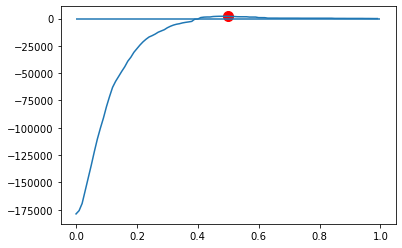

Maximum benefit at cutoff 0.5 with revenue delta of $2,118.45


In [11]:
# Create a list of potential cut-off probabilities and their respective overall change in revenue.

rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## Selecting the Optimal Cutoff


>Previously, we made a decision on who to provide the discount to based on a probability cutoff, but is this the best strategy?

>>For example, offering a discount to customers who are not profitable may harm our overall margins. If providing a discount results in a customer becoming unprofitable, it may be better to let them churn.
Even when considering revenue only, this strategy may not be the most optimal from a revenue perspective. We can calculate the expected impact of our strategy on revenue and prioritize customers for discounts based on the highest expected revenue impact (even if their churn probability is high but they are valuable customers).

>>The general principle here is that we should spend more on retaining high-value customers as the costs of losing them are higher. A common mistake in churn management is to focus solely on the churn probability while disregarding the value impact. We have seen cases where clients put equal effort into retaining both unprofitable and highly profitable customers.

---

In [12]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

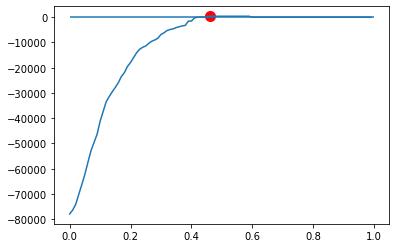

Maximum benefit at cutoff 0.46 with revenue delta of $396.02


In [13]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

>>Note that:
>>> - In this scenario, focusing solely on high-revenue customers is not the best approach since the overall revenue difference is smaller compared to targeting all customers. This is only true because the intervention only involves adjusting prices and doesn't require additional resources.
>>> - However, in many cases, preventing churn involves more than just adjusting prices, such as improving customer relationships, assigning key account managers, or other cost-incurring interventions. In these situations, targeting a smaller group of customers to save on these costs may be more beneficial, even if it results in a smaller overall revenue difference.



## The optional extra step involves using a forecast of churn instead of actual outcomes:

___In retrospective analysis of a strategy's effectiveness, using actual churn outcomes is acceptable. However, actual outcomes may not be readily available when conducting a prediction analysis.___

> Instead of using actual churn outcomes, the revenue optimization could be based on the predicted probabilities from a churn model. This approach, however, relies heavily on the accuracy of the model's predictions, and miscalibration of the model's probabilities can result in poor results. Therefore, it's important to assess the calibration of the model and potentially adjust it using techniques such as Platt scaling, sigmoid calibration, or isotonic regression. To avoid over-optimistic predictions, it's crucial to perform the analysis using out-of-sample data, not the training data.

---

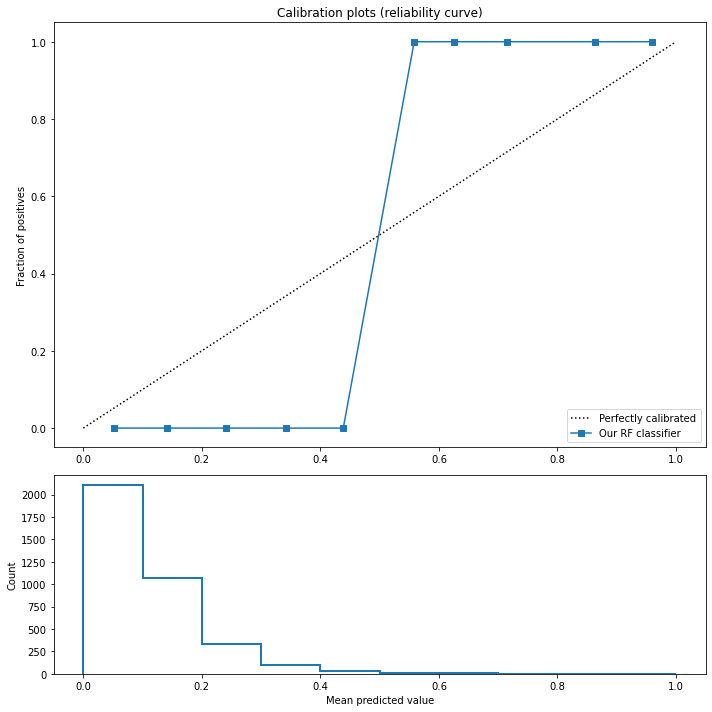

In [14]:
# Check our calibration
# (code copied from https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html)
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_df['churn'],
    y_prob=test_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

>This chart reveals the following information:

>>The top calibration curve displays a sigmoid shape, which is typical for an underconfident classifier.
>>The bottom chart shows that the model has a positive bias towards predicting a probability, potentially due to its low confidence.
>>However, to make the probabilities accurate, some adjustments would need to be made, but for demonstration purposes, we will not address this.

In [15]:
#The electricity revenue for each customer is calculated as the combination of energy consumption (product of amount and price) and meter rent.
#The power price is ignored for the moment, as additional information is needed from the client
#Remember to undo the log10 transformation applied during the data cleaning process.
test_df['basecase_revenue'] = np.power(10, test_df['forecast_cons_12m']) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']
#Considering Churn Impact
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn_probability'])

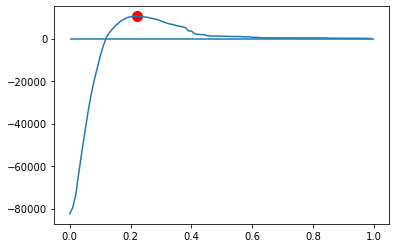

Maximum benefit at cutoff 0.22 with revenue delta of $10,466.89


In [16]:
#Generate a list of potential thresholds and the related total revenue changes.
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

---
## Next steps: How to select the discount?

The following steps should be taken to determine the optimal discount:

1. Evaluate different discount levels to determine the most effective one in retaining customers.
2. Predict customer response to the discount, including their churn probability, based on factors such as price, revenue, and margin.
3. Consider retraining the model using simpler variables to ensure the discount is properly factored into the predictions.
4. Balance the need for customer retention against the cost of offering discounts to customers who may not respond positively.
5. Attempt to maximize net revenue by finding the optimal level of discount for each customer that maximizes their predicted revenue or margin.

This can be approached as a two-dimensional optimization problem, with the objective of maximizing net revenue and decision variables being the level of discount offered and the fraction of customers to receive the discount. A more sophisticated approach would be to find the ideal discount for each customer that maximizes their predicted revenue or margin.

---
---